<a href="https://colab.research.google.com/github/rafaelkayser/water-quality-data-analysis-MG/blob/main/Analise_Indices_Qualidade_MG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análises dos índices de qualidade da água em estações de monitoramento no Estado de Minas Gerais

## Introdução

Este notebook apresenta a análise de índices de qualidade de água a partir da plotagem de gráfico de frequências e séries temporais. Os índices foram obtidos do Instituto Mineiro de Gestão das Águas (IGAM) e as estações de monitoramento selecionadas correspondem à bacia do Rio Paraopeba.

# Importar bibliotecas




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Leitura dos arquivos

Fazer o upload dos arquivos "indices_qualidade_igam.xlsx" e lista_estacoes.xlsx 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_indices = pd.read_excel('/content/indices_qualidade_igam.xlsx', sheet_name=0)

In [4]:
df_estacoes = pd.read_excel('/content/lista_estacoes.xlsx', sheet_name=0)
estacoes =df_estacoes['Estação']

In [5]:
#filtrar dataframe considerando as estações de monitoramento da bacia
df_indices_sel= df_indices[df_indices['Estação'].isin(estacoes)]  

# Gráficos de frequência de classes dos índices de qualidade por ano

In [6]:
def clas_iqa(df):
    
     if df <25:
         qi = 'Muito ruim'
     elif (df<50):
        qi = 'Ruim'
     elif df <70:
         qi = 'Médio'
     elif (df<90):
        qi = 'Bom'
     elif (df<100):
        qi = 'Excelente'
     else:
        qi = "Sem dados" 
     return qi 

def clas_iet(df):
    
     if df <47:
         qi = 'Ultraoligotrófica'
     elif (df<52):
        qi = 'Oligotrófica'
     elif df <59:
         qi = 'Mesotrófica'
     elif (df<63):
        qi = 'Eutrófica'
     elif (df<67):
        qi = 'Supereutrófica'     
     elif (df<90):
        qi = 'Hipereutrófica'        
     else:
        qi = "Sem dados"
     return qi 


def clas_ct(df):
    
     if df =='BAIXA':
         qi = 'Baixa'
     elif (df=='MÉDIA'):
        qi = 'Média'
     elif df =='ALTA':
         qi = 'Alta'  
     else:
        qi = "Sem dados"
     return qi 


In [7]:
#criar novos atributos com a classificação de cada índice de qualidade
df_indices_sel['IQA_clas'] = df_indices_sel['IQA'].apply(clas_iqa) 
df_indices_sel['IET_clas'] = df_indices_sel['IET'].apply(clas_iet) 
df_indices_sel['CT_clas'] = df_indices_sel['CT'].apply(clas_ct)

In [8]:
#visualização do dataframe
df_indices_sel

,Estação,Corpo de água,Municípios,Ano,IQA,CT,IET,IQA_clas,IET_clas,CT_clas
206,BP075,Córrego Pintado,IBIRITÉ,2013,35.1,ALTA,65.4,Ruim,Supereutrófica,Alta
207,BP092,Ribeirão Casa Branca,BRUMADINHO,2013,77.0,BAIXA,44.3,Bom,Ultraoligotrófica,Baixa
208,BP093,Ribeirão Casa Branca,BRUMADINHO,2013,NaN,NaN,NaN,Sem dados,Sem dados,Sem dados
209,BP094,Ribeirão Catarina,BRUMADINHO,2013,78.4,BAIXA,47.2,Bom,Oligotrófica,Baixa
210,BP073,Ribeirão das Areias ou Riacho,BETIM,2013,25.0,ALTA,67.7,Ruim,Hipereutrófica,Alta
...,...,...,...,...,...,...,...,...,...,...
483,BP072,Rio Paraopeba,BETIM,2019,52.0,BAIXA,56.4,Médio,Mesotrófica,Baixa
484,BPE2,Rio Paraopeba,BRUMADINHO,2019,49.1,BAIXA,57.3,Ruim,Mesotrófica,Baixa
485,BP082,Rio Paraopeba,"ESMERALDAS, SÃO JOSÉ DA",2019,59.9,MÉDIA,57.8,Médio,Mesotrófica,Média
486,BPE3,Rio Paraopeba,BRUMADINHO,2019,61.2,BAIXA,58.2,Médio,Mesotrófica,Baixa


In [11]:
def plot_qualindex_bar(df, index, fields, colors, nc, title):
    
    df_sum = df.groupby(['Ano',index],as_index=False).count()
    df_sum = df_sum[['Ano', index,'Estação']]
    df_sum['prop'] = (df_sum['Estação'] / len(estacoes))*100

    df_plot = df_sum.groupby(['Ano', index])['prop'].sum().unstack().fillna(0)

    plt.style.use(['seaborn'])

    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))
    # plot bars
    left = len(df_plot) * [0]
    for idx, name in enumerate(fields):
        plt.bar(df_plot.index, df_plot[name], bottom = left, color=colors[idx])
        left = left + df_plot[name]
        plt.legend(fields,loc='upper center', fontsize=14, bbox_to_anchor=(0.5, -0.1), ncol=nc, frameon=False) 

    ax.set_ylabel('Percentual de estações em cada classe (%)', fontsize=14)
    ax.set_title(title, fontsize=14)


    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height>0:
            ax.text(x+width/2, 
                    y+height/2, 
                    '{:.0f} %'.format(height), 
                    horizontalalignment='center', 
                    verticalalignment='center', color='black')


Gráfico de frequência do índice IQA

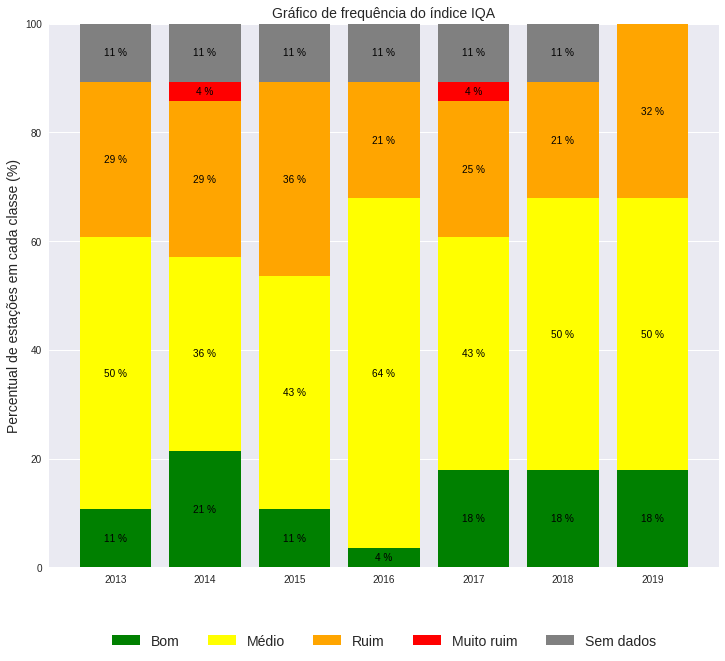

In [12]:
fields = ['Bom','Médio','Ruim','Muito ruim', 'Sem dados']  #
colors = ['green', 'yellow', 'orange', 'red', 'grey']  #
plot_qualindex_bar(df_indices_sel, 'IQA_clas', fields, colors, 5, "Gráfico de frequência do índice IQA")

Gráfico de frequência do índice IET

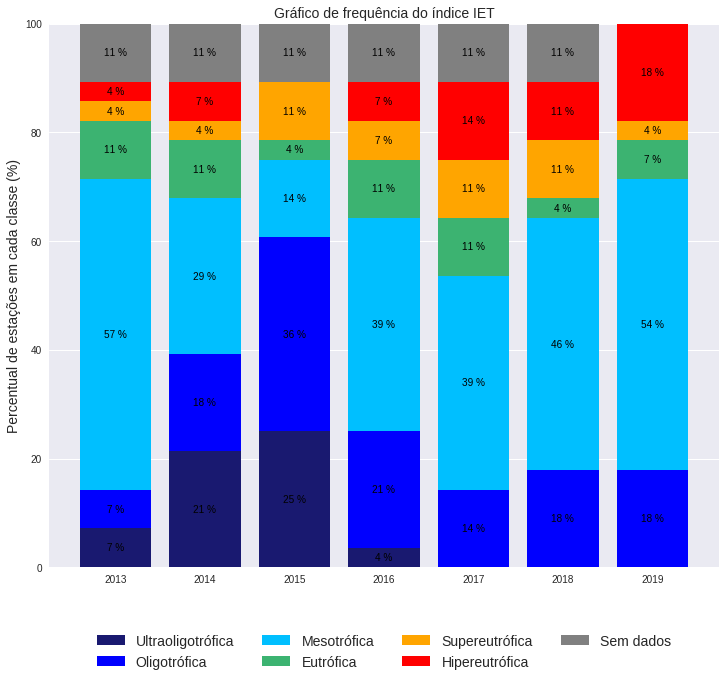

In [13]:
fields = ['Ultraoligotrófica','Oligotrófica','Mesotrófica','Eutrófica', 'Supereutrófica', 'Hipereutrófica', 'Sem dados']
colors = ['#191970', 'blue', '#00BFFF', '#3CB371', 'orange', 'red', 'grey']
plot_qualindex_bar(df_indices_sel, 'IET_clas', fields, colors, 4, "Gráfico de frequência do índice IET")

Gráfico de frequência do índice CT

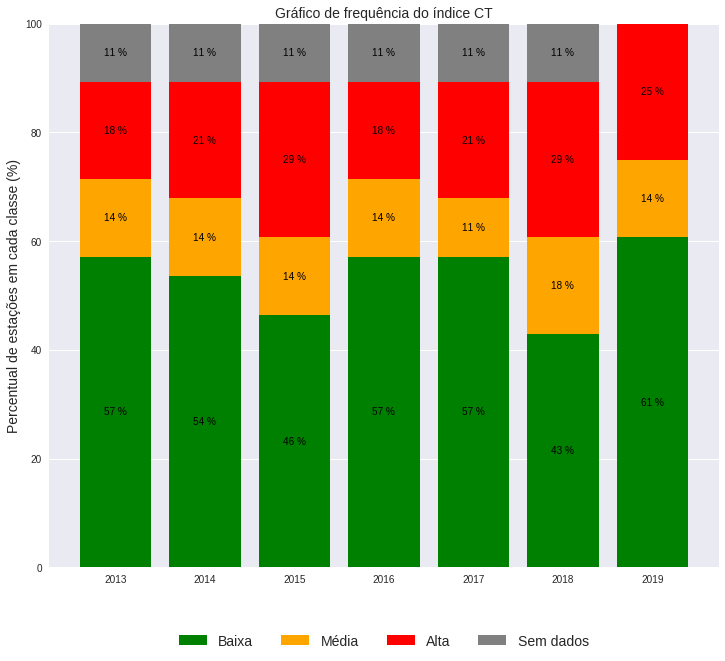

In [14]:
fields = ['Baixa','Média', 'Alta', 'Sem dados']
colors = ['green', 'orange', 'red', 'grey']
plot_qualindex_bar(df_indices_sel, 'CT_clas', fields, colors, 4, "Gráfico de frequência do índice CT")

## Séries históricas anuais dos índices de qualidade em cada estação de monitoramento

In [ ]:
def fc_grafico_iqa(ax, df,i):
    
    
    ax.plot(df['Ano'], df['IQA'], linestyle="-", linewidth=2, label= 'IQA', color='black', marker='^', markersize=8)
    
    list_c1 = np.repeat(a = 25, repeats = 7)
    ax.plot(df['Ano'], list_c1, linestyle="--",  linewidth=1, color='red', zorder=3, label='Muito ruim')
    
    list_c2 = np.repeat(a = 50, repeats = 7)
    ax.plot(df['Ano'], list_c2, linestyle="--",  linewidth=1, color='orange', zorder=3, label='Ruim')
    
    list_c3 = np.repeat(a = 70, repeats = 7)
    ax.plot(df['Ano'], list_c3, linestyle="--",  linewidth=1, color='yellow', zorder=3, label='Médio')
    
    list_c4 = np.repeat(a = 90, repeats = 7)
    ax.plot(df['Ano'], list_c4, linestyle="--",  linewidth=1, color='green', zorder=3, label='Bom')
    
    list_c5 = np.repeat(a = 100, repeats = 7)
    ax.plot(df['Ano'], list_c5, linestyle="--",  linewidth=1, color='blue', zorder=3, label='Excelente')
    
    
    labels= ['IQA', 'Muito ruim', 'Ruim', 'Médio', 'Bom', 'Excelente']
    
    title =  'Estação: '+ estacoes[i]
    ax.set_title(title, size=10)
    ax.set_ylim(20, 100)
    

    nlab= 6
    return labels, nlab



def fc_grafico_iet(ax, df,i):
    
    ax.plot(df['Ano'], df['IET'], linestyle="-", linewidth=2, label= 'IET', color='black', marker='^', markersize=8)
    
    list_c1 = np.repeat(a = 47, repeats = 7)
    ax.plot(df['Ano'], list_c1, linestyle="--",  linewidth=1, color='#191970', zorder=3, label='Ultraoligotrófica')
    
    list_c2 = np.repeat(a = 52, repeats = 7)
    ax.plot(df['Ano'], list_c2, linestyle="--",  linewidth=1, color='blue', zorder=3, label='Oligotrófica')
    
    list_c3 = np.repeat(a = 59, repeats = 7)
    ax.plot(df['Ano'], list_c3, linestyle="--",  linewidth=1, color='#00BFFF', zorder=3, label='Mesotrófica')
    
    list_c4 = np.repeat(a = 63, repeats = 7)
    ax.plot(df['Ano'], list_c4, linestyle="--",  linewidth=1, color='#3CB371', zorder=3, label='Eutrófica')
    
    list_c5 = np.repeat(a = 67, repeats = 7)
    ax.plot(df['Ano'], list_c5, linestyle="--",  linewidth=1, color='orange', zorder=3, label='Supereutrófica')    
        
    list_c6 = np.repeat(a = 80, repeats = 7)
    ax.plot(df['Ano'], list_c6, linestyle="--",  linewidth=1, color='red', zorder=3, label='Hipereutrófica')       


    labels= ['IET', 'Ultraoligotrófica', 'Oligotrófica', 'Mesotrófica', 'Eutrófica', 'Supereutrófica', 'Hipereutrófica']
    
    title =  'Estação: '+ estacoes[i]
    ax.set_title(title, size=10)
    ax.set_ylim(40, 80)
    
    nlab= 7
    return labels, nlab




def fc_grafico_ct(ax,df,i):
    
    xt = range(1, 8)
    
    df['CT']=df['CT'].replace(to_replace="ALTA",value=3)
    df['CT']=df['CT'].replace(to_replace="MÉDIA",value=2)
    df['CT']=df['CT'].replace(to_replace="BAIXA",value=1)
    
    ax.bar(xt, df['CT'], width = 0.4, color='blue', alpha = 0.5)
    


    list_c1 = np.repeat(a = 1, repeats = 7)
    ax.plot(xt, list_c1, linestyle="--",  linewidth=1, color='green', zorder=3, label='Baixa')
    
    list_c2 = np.repeat(a = 2, repeats = 7)
    ax.plot(xt, list_c2, linestyle="--",  linewidth=1, color='yellow', zorder=3, label='Média')
    
    list_c3 = np.repeat(a = 3, repeats = 7)
    ax.plot(xt, list_c3, linestyle="--",  linewidth=1, color='red', zorder=3, label='Alta')
    
    ax.set_ylim(0, 3.5)
    
    ax.set_title('Estação: '+ estacoes[i], size=10)
    
    ax.set_xticks(np.arange(1, 8, 2))
    ax.set_xticklabels(np.arange(2013, 2020, 2))
    
    ax.set_yticks([1,2,3])
    ax.set_yticklabels(['Baixa', 'Média', 'Alta'])   
    
    labels= ['Baixa', 'Média', 'Alta', 'CT']
    
    nlab= 4
    
    return labels, nlab


Série anual do índice IQA por estação de monitoramento

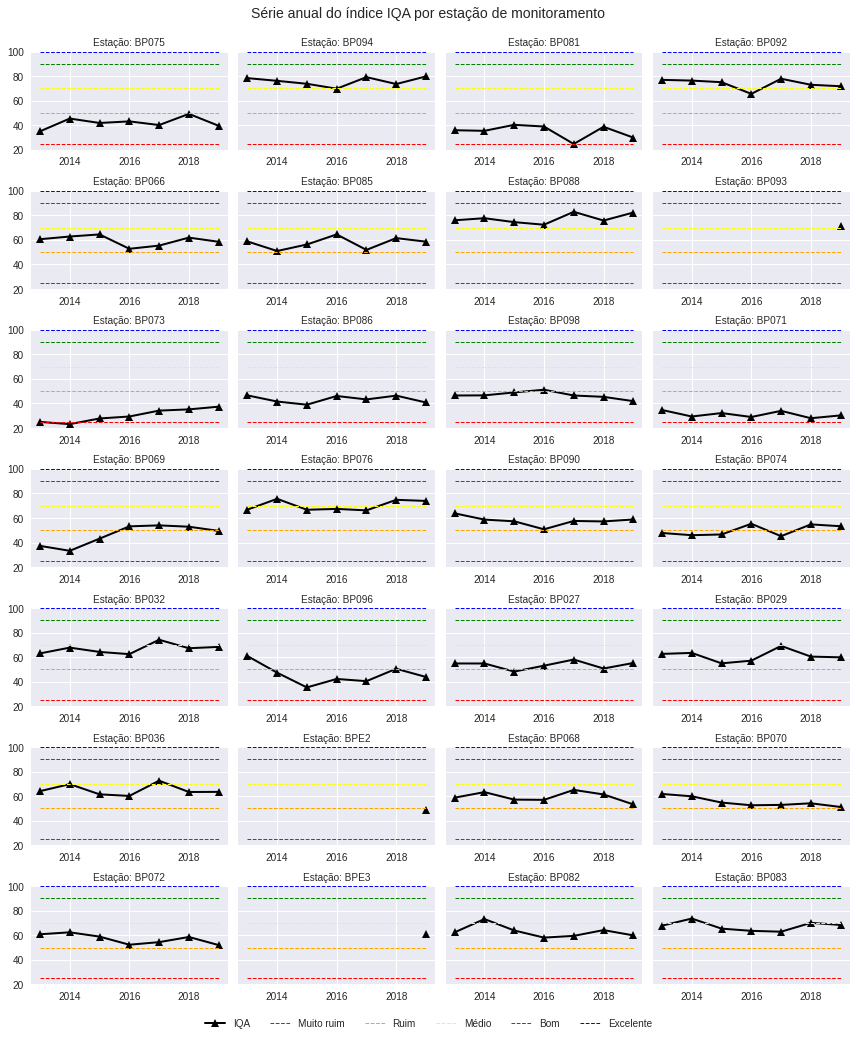

In [ ]:
nl=7 #numero de linhas
nc=4 #numero de colunas

fig, axes = plt.subplots(nl, nc, figsize=(12,14), sharex=False, sharey=True,
                        constrained_layout=False)

for i, ax in enumerate(axes.flat): 
    
    if (i < len(estacoes)):
    
        df_sel = df_indices_sel[df_indices_sel['Estação']==estacoes[i]]
        df_sel = df_sel[['Ano', 'IQA']]

        labels, nlab=fc_grafico_iqa(ax, df_sel,i)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.05) 

fig.suptitle('Série anual do índice IQA por estação de monitoramento', y=1.02, fontsize=14)

fig.legend(labels, loc="lower center", ncol=nlab)

plt.show()


Série anual do índice IET por estação de monitoramento

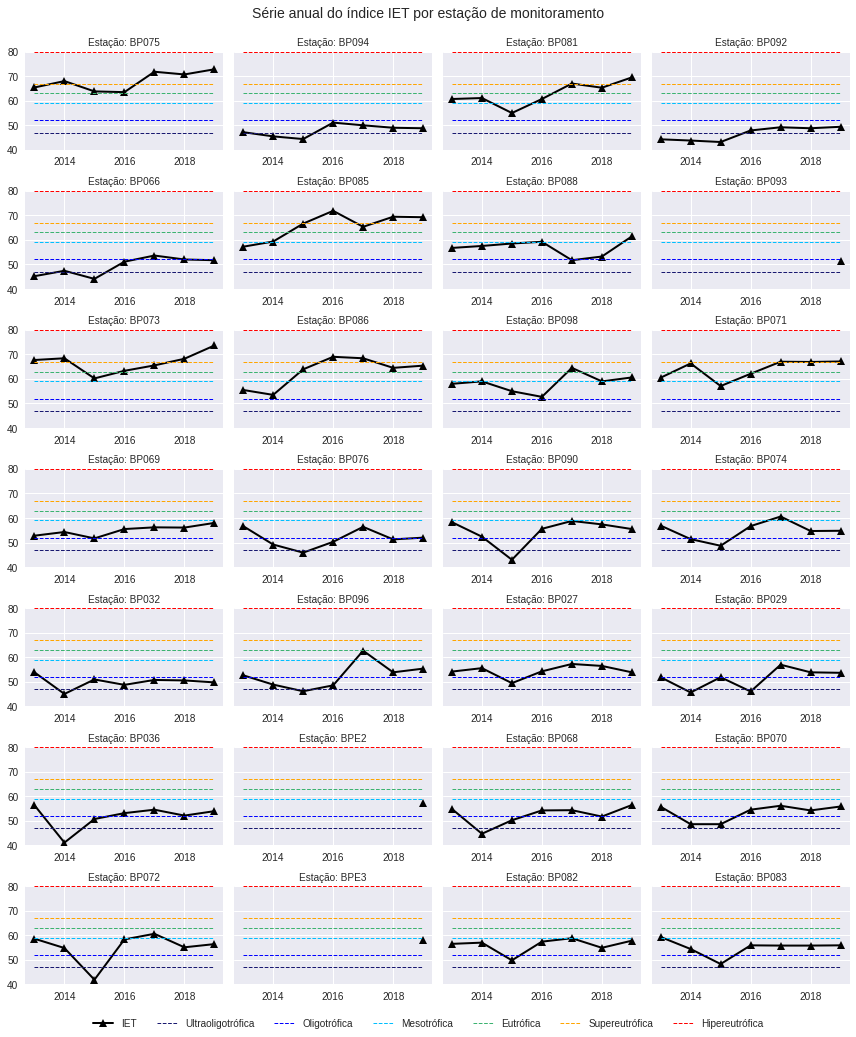

In [ ]:
nl=7 #numero de linhas
nc=4 #numero de colunas

fig, axes = plt.subplots(nl, nc, figsize=(12,14), sharex=False, sharey=True,
                        constrained_layout=False)

for i, ax in enumerate(axes.flat): 
    
    if (i < len(estacoes)):
    
        df_sel = df_indices_sel[df_indices_sel['Estação']==estacoes[i]]
        df_sel = df_sel[['Ano', 'IET']]

        labels, nlab=fc_grafico_iet(ax, df_sel,i)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.05) 

fig.suptitle('Série anual do índice IET por estação de monitoramento', y=1.02, fontsize=14)

fig.legend(labels, loc="lower center", ncol=nlab)

plt.show()

Série anual do índice CT por estação de monitoramento

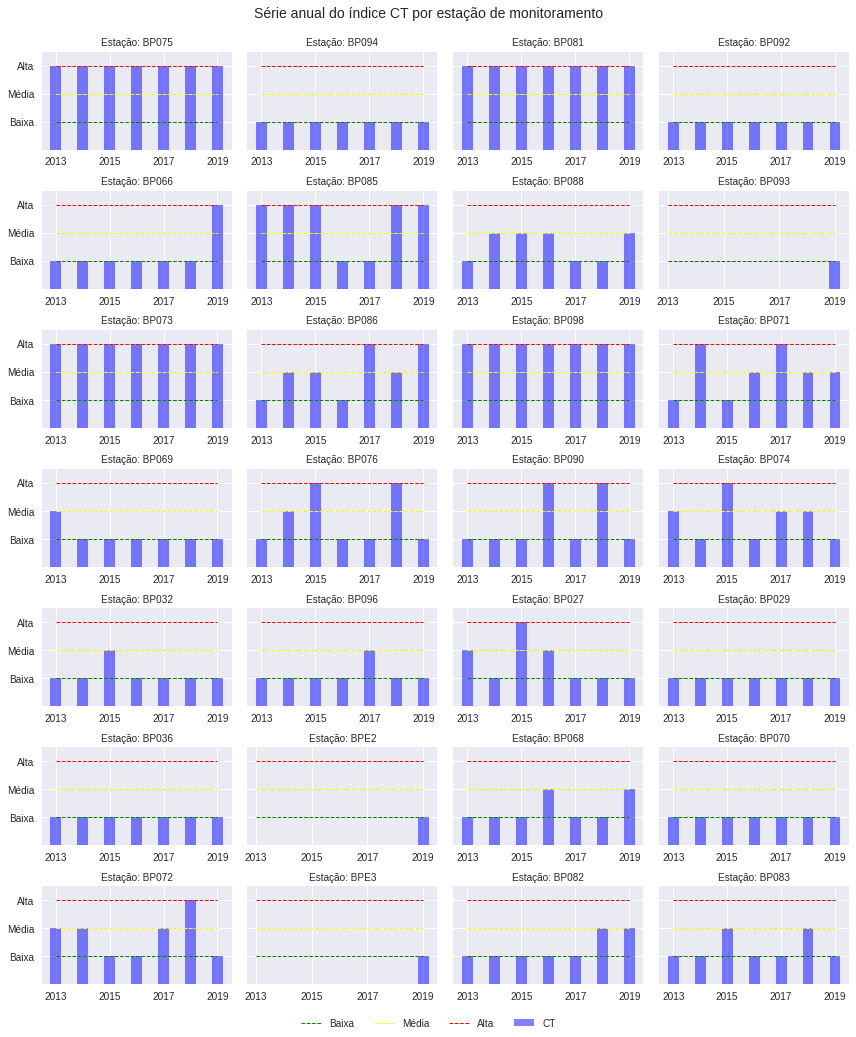

In [ ]:
nl=7 #numero de linhas
nc=4 #numero de colunas

fig, axes = plt.subplots(nl, nc, figsize=(12,14), sharex=False, sharey=True,
                        constrained_layout=False)

for i, ax in enumerate(axes.flat): 
    
    if (i < len(estacoes)):
    
        df_sel = df_indices_sel[df_indices_sel['Estação']==estacoes[i]]
        df_sel = df_sel[['Ano', 'CT']]

        labels, nlab=fc_grafico_ct(ax, df_sel,i)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.05) 

fig.suptitle('Série anual do índice CT por estação de monitoramento', y=1.02, fontsize=14)

fig.legend(labels, loc="lower center", ncol=nlab)

plt.show()